# Libraries Importing

In [1]:
# import libraries
import re
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
from difflib import get_close_matches
from scipy.sparse import csr_matrix
from IPython.display import Image, display
from IPython.core.display import HTML
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

# Data Importing

## Books Dataset

In [2]:
df_books =  pd.read_csv("D:/hp/Documents/CDS513/Assignment/goodbooks-10k-master/books.csv", na_values=[' ', ''])
df_books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


## Tags Dataset

In [3]:
df_tags =  pd.read_csv("D:/hp/Documents/CDS513/Assignment/goodbooks-10k-master/tags.csv", na_values=[' ', ''])
df_tags.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


## Ratings Dataset

In [4]:
df_ratings =  pd.read_csv("D:/hp/Documents/CDS513/Assignment/goodbooks-10k-master/ratings.csv", na_values=[' ', ''])
df_ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


## To Read Dataset

In [5]:
df_to_read =  pd.read_csv("D:/hp/Documents/CDS513/Assignment/goodbooks-10k-master/to_read.csv", na_values=[' ', ''])
df_to_read.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


## Book Tags Dataset

In [6]:
df_book_tags =  pd.read_csv("D:/hp/Documents/CDS513/Assignment/goodbooks-10k-master/book_tags.csv", na_values=[' ', ''])
df_book_tags.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


## Entity Relationship Diagram

In order to view the relationship between each table, an entity relationship diagram is being drawn. 

![img](ERD.png)

## Dataset Merging

In [7]:
# Merges the `df_book_tags` and `df_tags` DataFrames based on the 'tag_id' column.
# This combines the book IDs with their corresponding tag names.
df_book_tags_merged = pd.merge(df_book_tags, df_tags, how = 'left', left_on = 'tag_id'
                               , right_on = 'tag_id')
df_book_tags_merged.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,1,11305,37174,fantasy
2,1,11557,34173,favorites
3,1,8717,12986,currently-reading
4,1,33114,12716,young-adult


In [8]:
# Checks for null values in the merged DataFrame and prints the results.
print("Null values in Book Tags Merged DataFrame: \n", df_book_tags_merged.isnull().sum())

Null values in Book Tags Merged DataFrame: 
 goodreads_book_id    0
tag_id               0
count                0
tag_name             0
dtype: int64


# Data Cleaning

In [9]:
# Prints the shape (number of rows and columns) of each DataFrame.
print("Books DataFrame shape    : ", df_books.shape)
print("Tags DataFrame shape     : ", df_tags.shape)
print("Ratings DataFrame shape  : ", df_ratings.shape)
print("To Read DataFrame shape  : ", df_to_read.shape)
print("Book Tags DataFrame shape: ", df_book_tags.shape)

Books DataFrame shape    :  (10000, 23)
Tags DataFrame shape     :  (34252, 2)
Ratings DataFrame shape  :  (5976479, 3)
To Read DataFrame shape  :  (912705, 2)
Book Tags DataFrame shape:  (999912, 3)


In [10]:
unique_users = df_ratings['user_id'].nunique()
print(f"Number of unique users in df_ratings: {unique_users}")

Number of unique users in df_ratings: 53424


## Missing Value Handling

In [11]:
# Prints the total number of null values in each DataFrame
print("Null values in Books DataFrame: ", df_books.isnull().sum().sum())
print("Null values in Tags DataFrame: ", df_tags.isnull().sum().sum())
print("Null values in Ratings DataFrame: ", df_ratings.isnull().sum().sum())
print("Null values in To Read DataFrame: ", df_to_read.isnull().sum().sum())
print("Null values in Book Tags DataFrame: ", df_book_tags.isnull().sum().sum())

Null values in Books DataFrame:  2980
Null values in Tags DataFrame:  0
Null values in Ratings DataFrame:  0
Null values in To Read DataFrame:  0
Null values in Book Tags DataFrame:  0


In [12]:
# Check for null values in each attribute of the df_books DataFrame
null_values = df_books.isnull().sum()
print(null_values[null_values > 0])

isbn                          700
isbn13                        585
original_publication_year      21
original_title                590
language_code                1084
dtype: int64


In [13]:
# Remove NULL values from the 'original_title' column in the DataFrame
df_books = df_books[df_books['original_title'].notnull()]
print(len(df_books))

9410


## Remove Non-Unique original_title Features in Books Dataset

In [14]:
# Check duplicated values in the df_books DataFrame
num_duplicated_original_titles = df_books['original_title'].duplicated(keep=False).sum()
print(f"Number of duplicated original_title in df_books: {num_duplicated_original_titles}")

Number of duplicated original_title in df_books: 259


In [15]:
# Removes duplicate entries of the "original_title" from the Books DataFrame.
df_books = df_books[df_books['original_title'].duplicated(keep=False) == False]
print(len(df_books))

9151


## Remove Books_id that Unexist in Books Dataframe from Each Dataframe

### df_book_tags_merged Dataframe

In [16]:
print(len(df_book_tags_merged))

999912


In [17]:
# Find rows in df_book_tags where goodreads_book_id does not exist in df_books
missing_goodreads_ids = ~df_book_tags_merged['goodreads_book_id'].isin(df_books['goodreads_book_id'])
missing_count = missing_goodreads_ids.sum()

print(f"Number of rows in df_book_tags with goodreads_book_id not in df_books: {missing_count}")

Number of rows in df_book_tags with goodreads_book_id not in df_books: 84850

In [18]:
df_book_tags_merged = df_book_tags_merged[df_book_tags_merged['goodreads_book_id'].isin(df_books['goodreads_book_id'])]
print(len(df_book_tags_merged))

915062


### df_ratings Dataframe

In [19]:
len(df_ratings)

5976479

In [20]:
# Find rows in df_ratings where book_id does not exist in df_books
missing_book_ids = ~df_ratings['book_id'].isin(df_books['book_id'])
missing_count = missing_book_ids.sum()

print(f"Number of rows in df_ratings with book_id not in df_books: {missing_count}")

Number of rows in df_ratings with book_id not in df_books: 324438


In [21]:
df_ratings  = df_ratings[df_ratings['book_id'].isin(df_books['book_id'])]
print(len(df_ratings))

5652041


## Drop Unrelated Attributes for Books Dataframe

In [22]:
# Select specific columns to keep in df_books
columns_to_keep = ['book_id', 'original_title', 'title', 'authors', 'image_url', 'average_rating']
df_books = df_books[columns_to_keep]

# Display the first few rows of the updated DataFrame
df_books.head()

,book_id,original_title,title,authors,image_url,average_rating
0,1,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,https://images.gr-assets.com/books/1447303603m...,4.34
1,2,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",https://images.gr-assets.com/books/1474154022m...,4.44
3,4,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,https://images.gr-assets.com/books/1361975680m...,4.25
4,5,The Great Gatsby,The Great Gatsby,F. Scott Fitzgerald,https://images.gr-assets.com/books/1490528560m...,3.89
5,6,The Fault in Our Stars,The Fault in Our Stars,John Green,https://images.gr-assets.com/books/1360206420m...,4.26


# Exploratory Data Analysis

## Books Dataset

In [23]:
# Displays the data types of each column in the Books DataFrame.
df_books.dtypes

book_id             int64
original_title     object
title              object
authors            object
image_url          object
average_rating    float64
dtype: object

In [24]:
# Converts specific columns in the Books DataFrame to string type.
df_books['title']           = df_books['title'].astype('str')
df_books['authors']         = df_books['authors'].astype('str')
df_books['image_url']       = df_books['image_url'].astype('str')
df_books['original_title']  = df_books['original_title'].astype('str')

In [25]:
# Iterates through each column of the Books DataFrame and prints the number of unique values.
for column in df_books:
  unique_vals = np.unique(df_books[column])
  nr_values = len(unique_vals)
  if nr_values < 36:
    print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
  else:
    print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature book_id :9151
The number of values for feature original_title :9151
The number of values for feature title :9137
The number of values for feature authors :4353
The number of values for feature image_url :6024
The number of values for feature average_rating :182


### Distribution of Average Rating

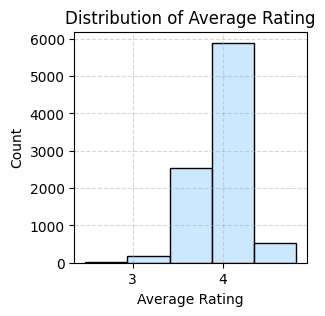

In [26]:
plt.figure(figsize=(3, 3))
sns.histplot(data = df_books, x='average_rating', bins=5, color='#bae1ff') 
plt.title("Distribution of Average Rating")
plt.xlabel("Average Rating")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Ratings Dataset

In [27]:
# Displays the data types of each column in the Ratings DataFrame.
df_ratings.dtypes

user_id    int64
book_id    int64
rating     int64
dtype: object

In [28]:
# Iterates through each column of the Ratings DataFrame and prints the number of unique values.
for column in df_ratings:
  unique_vals = np.unique(df_ratings[column])
  nr_values = len(unique_vals)
  if nr_values < 36:
    print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
  else:
    print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature user_id :53424
The number of values for feature book_id :9151
The number of values for feature rating :5 -- [1 2 3 4 5]


### Distribution of Ratings

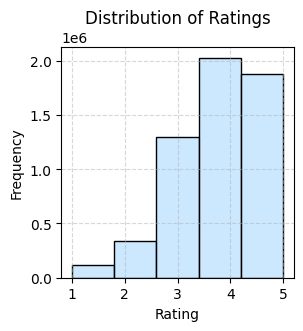

In [29]:
plt.figure(figsize=(3, 3))
sns.histplot(df_ratings['rating'], bins=5, color="#bae1ff")
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

### Correlation Matrix

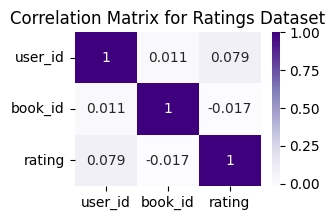

In [30]:
numerical_cols_ratings = df_ratings.select_dtypes(include=np.number).columns
plt.figure(figsize=(3, 2))
sns.heatmap(df_ratings[numerical_cols_ratings].corr(), annot=True, cmap='Purples')
plt.title('Correlation Matrix for Ratings Dataset')
plt.show()

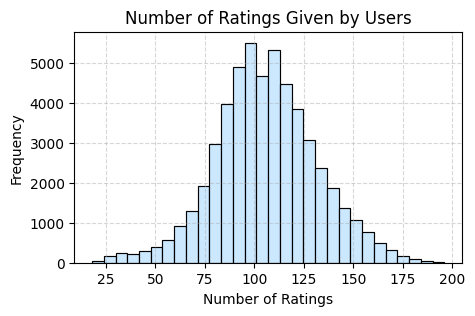

In [31]:
ratings_per_user = df_ratings['user_id'].value_counts()

plt.figure(figsize=(5, 3))
sns.histplot(ratings_per_user, bins=30, color="#bae1ff")
plt.title('Number of Ratings Given by Users')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

## Book Tags (Merged) Dataset

In [32]:
# Displays the data types of each column in the Book Tags Merged DataFrame.
df_book_tags_merged.dtypes

goodreads_book_id     int64
tag_id                int64
count                 int64
tag_name             object
dtype: object

In [33]:
# Iterates through each column of the Book Tags Merged DataFrame and prints the number of unique values.
for column in df_book_tags_merged:
  unique_vals = np.unique(df_book_tags_merged[column])
  nr_values = len(unique_vals)
  if nr_values < 36:
    print('The number of values for feature {} :{} -- {}'.format(column, nr_values, unique_vals))
  else:
    print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature goodreads_book_id :9151
The number of values for feature tag_id :32017
The number of values for feature count :8970
The number of values for feature tag_name :32017


### Top 10 Most Frequent Tags

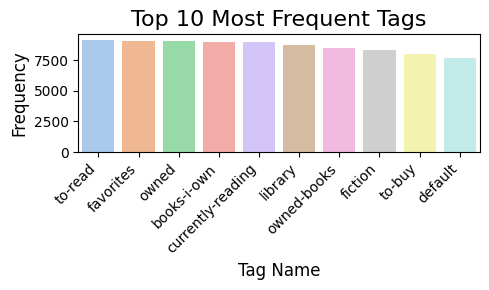

In [34]:
top_10_tags = df_book_tags_merged['tag_name'].value_counts().head(10)

plt.figure(figsize=(5, 3))
sns.barplot(x=top_10_tags.index, y=top_10_tags.values, palette="pastel", hue=top_10_tags.index)
plt.title("Top 10 Most Frequent Tags", fontsize=16)
plt.xlabel("Tag Name", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

### Correlation Matrix

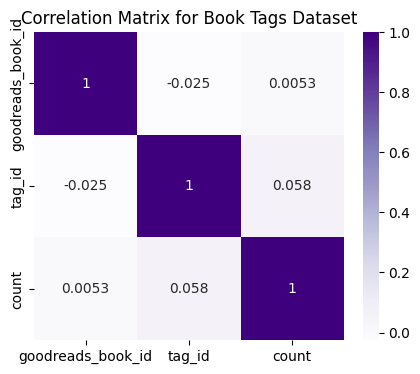

In [35]:
numerical_cols_book_tags = df_book_tags_merged.select_dtypes(include=np.number).columns

plt.figure(figsize=(5, 4))
sns.heatmap(df_book_tags_merged[numerical_cols_book_tags].corr(), annot=True, cmap='Purples')
plt.title('Correlation Matrix for Book Tags Dataset')
plt.show()

## Export Preprocessed Dataset

In [36]:
df_books.to_csv("cleaned_books.csv", index=False)
df_ratings.to_csv("cleaned_ratings.csv", index=False)